# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import os

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



In [6]:
api_key

'190be5452c571dbedf41d9fed281cedd'

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
#openweathermap URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"


In [9]:
  
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
count = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    city_count = 1
    count +=1
    
    # Try statement to append calls where value is found 
    try: 
        response = requests.get(f"{url}&q={city}&appid={api_key}&units={units}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {city_count} of Set {count} | {city}")

        
        
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue


Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 2 | mataura
Processing Record 1 of Set 3 | korla
Processing Record 1 of Set 4 | east london
Processing Record 1 of Set 5 | raub
Processing Record 1 of Set 6 | mar del plata
Processing Record 1 of Set 7 | busselton
Processing Record 1 of Set 8 | kapaa
Processing Record 1 of Set 9 | pevek
Processing Record 1 of Set 10 | awbari
Processing Record 1 of Set 11 | rikitea
City not found. Skipping...
Processing Record 1 of Set 13 | garowe
Processing Record 1 of Set 14 | butaritari
Processing Record 1 of Set 15 | ushuaia
Processing Record 1 of Set 16 | belmonte
Processing Record 1 of Set 17 | karaton
Processing Record 1 of Set 18 | barrow
Processing Record 1 of Set 19 | hilo
Processing Record 1 of Set 20 | muros
Processing Record 1 of Set 21 | luderitz
City not found. Skipping...
Processing Record 1 of Set 23 | litovko
Processing Record 1 of Set 24 | kapoeta
Processing Record 1 of Set 25 | sur
Processing Record 1

Processing Record 1 of Set 202 | siocon
Processing Record 1 of Set 203 | margate
Processing Record 1 of Set 204 | albion
Processing Record 1 of Set 205 | stratham
Processing Record 1 of Set 206 | taoudenni
Processing Record 1 of Set 207 | akropong
Processing Record 1 of Set 208 | hasaki
Processing Record 1 of Set 209 | netanya
Processing Record 1 of Set 210 | nouadhibou
Processing Record 1 of Set 211 | castro
Processing Record 1 of Set 212 | altdorf
Processing Record 1 of Set 213 | saint cloud
Processing Record 1 of Set 214 | pacific grove
Processing Record 1 of Set 215 | meridian
Processing Record 1 of Set 216 | araouane
Processing Record 1 of Set 217 | kviteseid
Processing Record 1 of Set 218 | tiksi
Processing Record 1 of Set 219 | sharjah
Processing Record 1 of Set 220 | ixtapa
Processing Record 1 of Set 221 | anamur
Processing Record 1 of Set 222 | pandamatenga
Processing Record 1 of Set 223 | lermontovka
Processing Record 1 of Set 224 | mporokoso
Processing Record 1 of Set 225 | 

Processing Record 1 of Set 401 | carupano
Processing Record 1 of Set 402 | high level
City not found. Skipping...
Processing Record 1 of Set 404 | oranjestad
Processing Record 1 of Set 405 | brodokalmak
Processing Record 1 of Set 406 | tuatapere
Processing Record 1 of Set 407 | huarmey
Processing Record 1 of Set 408 | chimoio
Processing Record 1 of Set 409 | loreto
Processing Record 1 of Set 410 | aleksandrovskoye
Processing Record 1 of Set 411 | amboasary
Processing Record 1 of Set 412 | chapais
Processing Record 1 of Set 413 | bukachacha
Processing Record 1 of Set 414 | sinnamary
City not found. Skipping...
Processing Record 1 of Set 416 | cabo san lucas
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 1 of Set 420 | san quintin
Processing Record 1 of Set 421 | rapid valley
City not found. Skipping...
Processing Record 1 of Set 423 | fereydun kenar
Processing Record 1 of Set 424 | springdale
Processing Record 1 of Set 425 | albert 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:

#weather dataframe
df_weather = pd.DataFrame({"City": city_name,
                            "Cloudiness": cloudiness,
                            "Country": country,
                            "Date": date,
                            "Humidity": humidity,
                            "Latitude": lat,
                            "Longitude": lng,
                            "Max Temp": max_temp,
                            "Wind Speed": wind_speed})
df_weather.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Mataura,6,NZ,1582528110,62,-46.19,168.86,64.00,7.00
1,Korla,75,CN,1582528111,34,41.76,86.15,36.52,3.65
2,East London,15,ZA,1582528112,72,-33.02,27.91,66.20,3.36
3,Raub,57,MY,1582528114,54,3.79,101.86,87.80,4.12
4,Mar del Plata,0,AR,1582528004,93,-38.00,-57.56,64.00,13.87


In [11]:
#export city data into CSV
df_weather.to_csv("WeatherPy.csv", encoding='utf-8', index=False)

In [12]:
df_weather.count()

City          553
Cloudiness    553
Country       553
Date          553
Humidity      553
Latitude      553
Longitude     553
Max Temp      553
Wind Speed    553
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

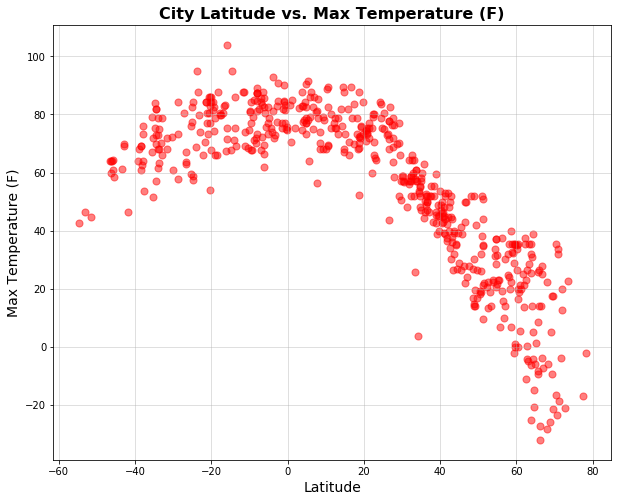

In [13]:
fig, ax = plt.subplots()
df_weather.plot(kind="scatter", x="Latitude", y="Max Temp",alpha=.5,figsize=(10,8),s=50,color="red", ax=ax)
ax.set_title("City Latitude vs. Max Temperature (F)", fontsize=16, fontweight="bold")
ax.set_ylabel("Max Temperature (F)", fontsize=14)
ax.set_xlabel("Latitude", fontsize=14)
ax.grid(alpha=.5)


In [14]:
#save plot
path_latvstemp = os.path.join(os.path.expanduser("~"), "Desktop", "Lat_Vs_Temp.png")
fig.savefig(path_latvstemp)

#### Latitude vs. Humidity Plot

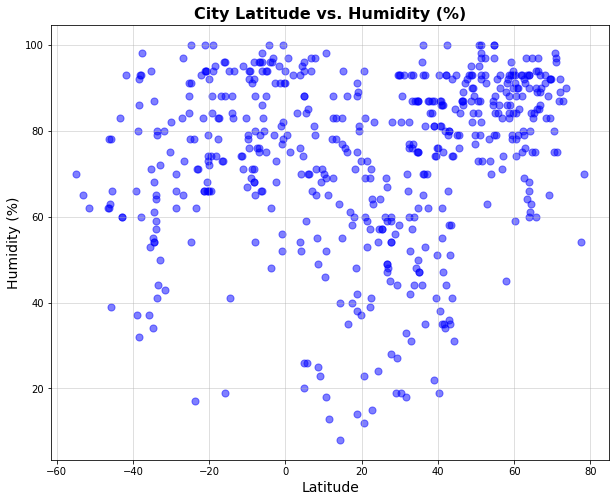

In [15]:
fig2, ax2 = plt.subplots()
df_weather.plot(kind="scatter", x="Latitude", y="Humidity",color="blue",figsize=(10,8), alpha=.5 ,s=50, ax=ax2)
ax2.set_title("City Latitude vs. Humidity (%)", fontsize=16, fontweight="bold")
ax2.set_ylabel("Humidity (%)", fontsize=14)
ax2.set_xlabel("Latitude", fontsize=14)
ax2.grid(alpha=.5)


In [16]:
#save plot
path_latvshumid = os.path.join(os.path.expanduser("~"), "Desktop", "Lat_Vs_Humid.png")
fig2.savefig(path_latvshumid)

#### Latitude vs. Cloudiness Plot

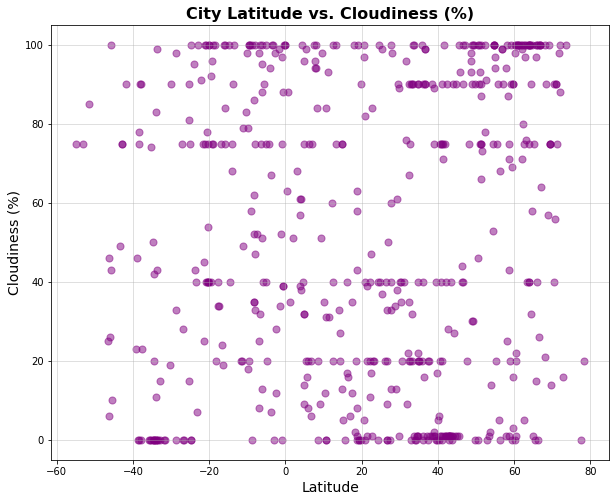

In [17]:
fig3, ax3 = plt.subplots()
df_weather.plot(kind="scatter", x="Latitude", y="Cloudiness",color="purple",figsize=(10,8), alpha=.5 ,s=50, ax=ax3)
ax3.set_title("City Latitude vs. Cloudiness (%)", fontsize=16, fontweight="bold")
ax3.set_ylabel("Cloudiness (%)", fontsize=14)
ax3.set_xlabel("Latitude", fontsize=14)
ax3.grid(alpha=.5)


In [18]:
#save plot
path_latvsclouds = os.path.join(os.path.expanduser("~"), "Desktop", "Lat_Vs_Cloudiness.png")
fig3.savefig(path_latvsclouds)

#### Latitude vs. Wind Speed Plot

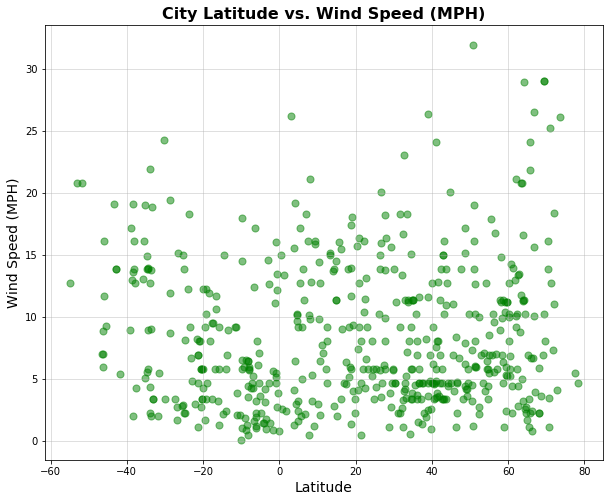

In [19]:
fig4, ax4 = plt.subplots()
df_weather.plot(kind="scatter", x="Latitude", y="Wind Speed",color="green",figsize=(10,8), alpha=.5 ,s=50, ax=ax4)
ax4.set_title("City Latitude vs. Wind Speed (MPH)", fontsize=16, fontweight="bold")
ax4.set_ylabel("Wind Speed (MPH)", fontsize=14)
ax4.set_xlabel("Latitude", fontsize=14)
ax4.grid(alpha=.5)


In [20]:
#save plot
path_latvswindspeed = os.path.join(os.path.expanduser("~"), "Desktop", "Lat_Vs_Wind_Speed.png")
fig4.savefig(path_latvswindspeed)